# Breadth-First Search

## Lesson Overview

> **Breadth-first search** is a graph search technique that prioritizes searching all nodes adajacent to the current node before processing any further.

While depth-first search prioritizes searching as *deep* as possible along a single pathway, breadth-first search prioritizes searching as *wide* as possible adjacent to the current node.

When we talk about breadth, a visual example can help illustrate the term.

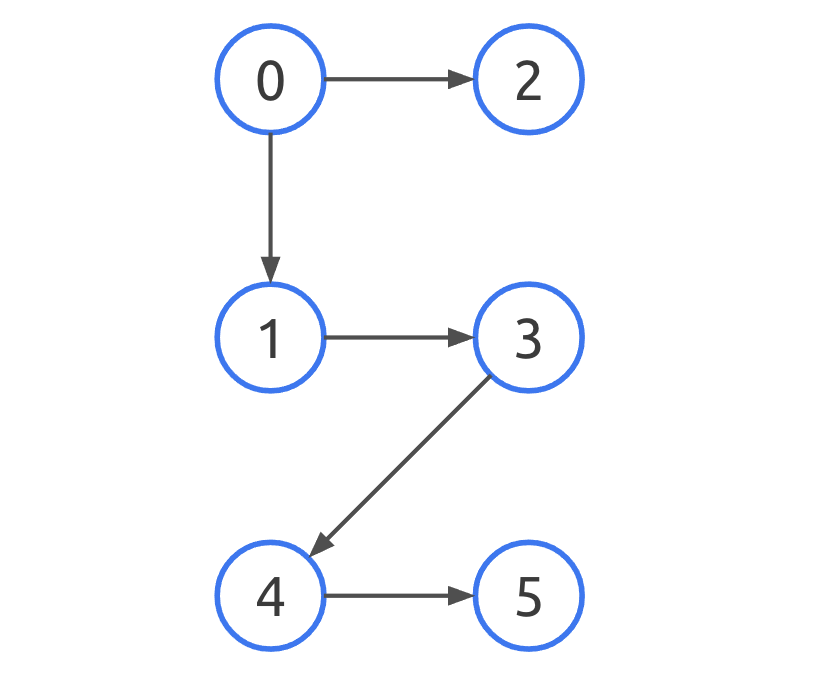

If we were looking for the node with the value $2$ and tried a depth-first search, we would explore the nodes in the following order (or similar, depending on the implementation):

$0, 1, 3, 4, 5, 2$

In breadth-first search, we start by examining a node's neighbors before moving on to any of the connected nodes. This allows us to explore a graph differently than we would in depth-first search, and is used for solving different problems where depth-first search doesn't necessarily produce the quickest or best solutions. For instance, in the above graph, we prioritize the first path we see when searching via depth-first search, which causes us to go down a fairly long chain of nodes before we see 2, the node we're looking for.

### Breadth-first search in code

The major difference between breadth-first search and depth-first search is that breadth-first search uses a queue to process nodes, rather than the stack (or recursive stack) that depth-first search typically utilizes. Beyond that, we can still use the same `DirectedGraph` and `Node` classes that we've used in previous lessons.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
#persistent
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

  def breadth_first_search(self, node_name_to_find):
    # We want to set up a queue and a way to check which nodes we've seen.
    # If the graph has no nodes in it, return None, since we won't be able to
    # find the node we're looking for.
    node_queue = []
    if not self.node_list:
      return None
    visited_nodes = []
    
    # The graph may not be connected, so we should iterate through node_list
    # and add those nodes to the queue if we haven't seen them before.
    for node in self.node_list:
      if node not in visited_nodes:
        visited_nodes.append(node)
        node_queue.append(node)

      # Once we've added a start point to the queue, we can check the front of
      # the queue and see if that's the node we're looking for. If not, we 
      # enqueue the node's connections (provided we haven't seen them) so that
      # we can explore from those nodes next.
      while node_queue:
        node_to_check = node_queue.pop(0)
        if node_to_check.name == node_name_to_find:
          return node_to_check
        else:
          for next_node in node_to_check.connected_to:
            if next_node not in visited_nodes:
              visited_nodes.append(next_node)
              node_queue.append(next_node)

Here, we're checking to see if we've seen the node before we enqueue it, so that we don't do additional work and enqueue a node that we've already seen. By using a queue, we process all of a node's direct connections before searching the rest of its descendants.

## Question 1

Which of the following statements about breadth-first search are true?

**a)** Breadth-first search relies on a queue to traverse each node and then the nodes adjacent to that node.

**b)** Breadth-first search has a smaller runtime complexity to depth-first search, since it's searching nodes adjacent to the current node rather than following a lengthy path before backtracking.

**c)** Breadth-first search attempts to visit every node and every node connected to another node, so it runs in $O(n^2)$ time where $n$ is the number of nodes in the graph.

**d)** Unlike depth-first search, breadth-first search doesn't need to keep track of what nodes have already been seen because breadth-first search doesn't rely on recursion.

**e)** Depth-first search over a complete graph (a graph with an edge between every pair of nodes) has a shorter worst case runtime than breadth-first search, since each node is connected to every other node.

### Solution

The correct answer is **a)**.

**b)** Both breadth- and depth-first search have the same runtime complexity (though depending on your graph, one may complete more quickly than the other), namely $O(n)$ where $n$ is the total number of nodes.

**c)** While breadth-first search does process nodes and their neighbors, it should visit any given node only once (by keeping track of the nodes it has visited). As a result, it runs in $O(n)$ time.

**d)** Breadth-first search loops until it finds the node or sees every node in the graph. If you don't keep track of visited nodes, that loop could run forever.

**e)** In the worst case, the search needs to visit every node. Both depth-first and breadth-first search should, if implemented well, visit each node exactly once, so both have a runtime complexity of $O(n)$.

## Question 2

Finding cycles in a graph is an important aspect of computer science, so let's try implementing a `has_cycle` method for the `UndirectedGraph` class that returns `True` if a cycle is detected and `False` otherwise.

In graph theory, a **cycle** is a path between a group of nodes that contains a duplicate. A **cyclic graph** is a graph that contains at least one cycle. For instance, this graph is a cyclic graph:

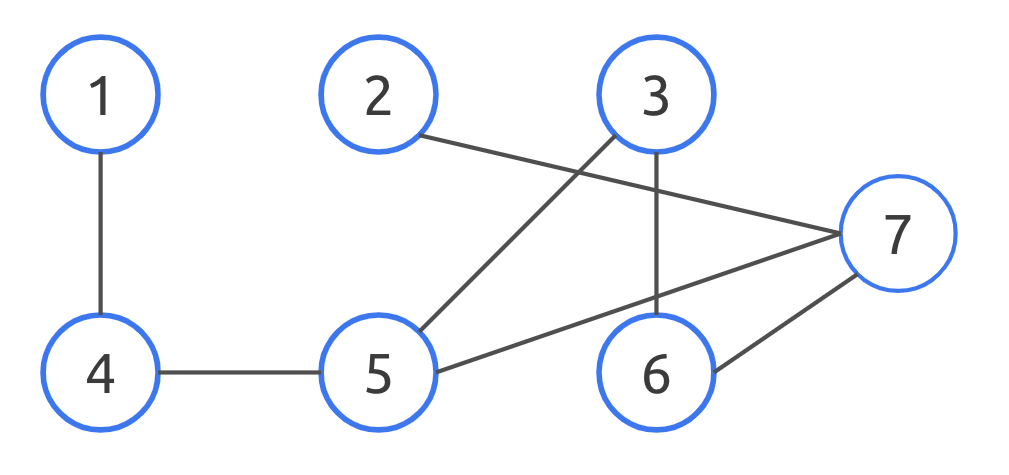

It contains a cycle $3 \rightarrow 5 \rightarrow 7 \rightarrow 6 \rightarrow 3$. A graph with *no* cycles is called **acyclic**. If the entire graph is a single cycle, it is known as a **cycle graph**.

Note that this graph is undirected. As such, every $A \rightarrow B$ edge has a corresponding $B \rightarrow A$ edge. However, the path $A \rightarrow B \rightarrow A$ is *not* considered a cycle, since it is trivially true for any pair of connected nodes in an undirected graph.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def has_cycle(self):
    # TODO(you): implement.
    print('This method has not been implemented.')

### Hint

This can be tricky. Essentially, for any node, see if you can trace a path through the graph back to that node. This is a form of a search algorithm, except instead of looking for a specific node you're trying to eventually find a node you've already seen.

If you're using breadth-first search, start with an arbitrary node and go through all the nodes that your node is connected to. As you're writing your code, keep in mind that this is an undirected graph, so any $A \rightarrow B$ edge has an equivalent $B \rightarrow A$ edge. This isn't considered a cycle, so keep track of the node you came from to avoid labeling $A \rightarrow B \rightarrow A$ as a cycle. If you revisit a node that you've already seen in any other context, then you know a cycle exists. For example, if you revisit $A$ in the context of $A \rightarrow B \rightarrow C \rightarrow A$, you have found a cycle. 

```python
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def has_cycle(self):
    if self.node_list:
      node_queue = []
      for node in self.node_list:
        visited_nodes = []
        # TODO(you): Append the node to the node queue.
        while node_queue:
          # TODO(you): Identify the current and previous nodes, and append the
          # current node to the visited nodes.
          for connected_node in current_node.connected_to:
            if connected_node == previous_node:
              # TODO(you)
            if connected_node in visited_nodes:
              # TODO(you)
            node_queue.append((connected_node, current_node))
    return False
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[3])
node_list[1].add_connection(node_list[4])

print(graph.has_cycle())
# Should print: False

node_list[3].add_connection(node_list[4])

print(graph.has_cycle())
# Should print: True

### Solution

It is important to track all the nodes we've visited previously. However, since this graph is undirected, we should take steps to avoid trying to go back to a node we just came from. One way of doing that is to add a `previous_node` to the node_queue and checking to see if our `connected_node` is the same as our previous one. If it is, we know that we're trying to double-back on an undirected edge, so we can skip checking that. After checking that, if our node is inside of our `visited_nodes`, we know that we've seen it before but not via an undirected edge, so it must be a cycle.

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def has_cycle(self):
    if self.node_list:
      node_queue = []
      for node in self.node_list:
        visited_nodes = []
        node_queue.append((node, None))
        while node_queue:
          current_node, previous_node = node_queue.pop(0)
          visited_nodes.append(current_node)
          for connected_node in current_node.connected_to:
            if connected_node == previous_node:
              continue
            if connected_node in visited_nodes:
              return True
            node_queue.append((connected_node, current_node))
    return False

## Question 3

Now that we've determined how to identify if a cycle exists, try to isolate it and show it to the user. Write a `find_cycle` method that outputs a cycle in a graph, if one exists, or an empty list otherwise.

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def has_cycle(self):
    if self.node_list:
      node_queue = []
      for node in self.node_list:
        visited_nodes = []
        node_queue.append((node, None))
        while node_queue:
          current_node, previous_node = node_queue.pop(0)
          visited_nodes.append(current_node)
          for connected_node in current_node.connected_to:
            if connected_node == previous_node:
              continue
            if connected_node in visited_nodes:
              return True
            node_queue.append((connected_node, current_node))
    return False

  def find_cycle(self):
    # TODO(you): implement.
    print('This method has not been implemented.')

### Hint

Note that finding if a cycle exists and then returning that path isn't enough, as you may detect a cycle that starts or ends with nodes not in that cycle. Specifically, consider the following graph.

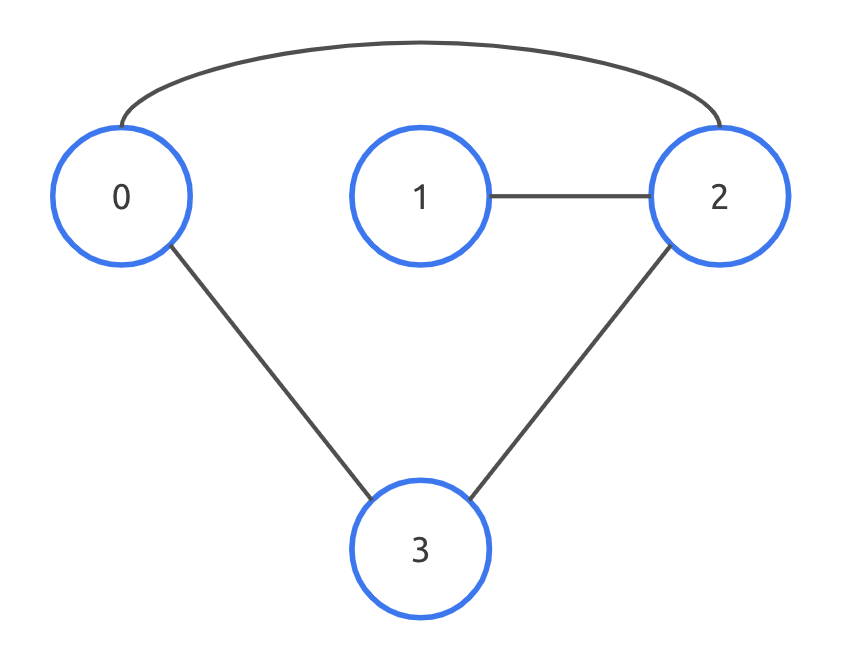

You should return some form of $0, 2, 3$, but if you start searching from $1$, you may return $1, 2, 3, 0$. A cycle is still in there, but that is not a cycle as $1$ isn't part of the actual cycle.

One way to solve this is to start your cycle detection from each node in the graph, guaranteeing that if a cycle exists, you will eventually choose a node that starts it.

```python
def find_cycle(self):
  if self.node_list:
    node_queue = []
    for node in self.node_list:
      possible_cycle = []
      # TODO(you): Append the possible cycle to the node queue.
      while node_queue:
        # Append the current node to the possible cycle.
        for connected_node in current_node.connected_to:
          if connected_node == previous_node:
            # TODO(you)
          if connected_node in possible_cycle:
              while connected_node != possible_cycle[0]:
                # TODO(you)
              return possible_cycle
          # TODO(you): Append the connected node, current node, and possible
          # cycle to the queue.
  return []
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[3])
node_list[1].add_connection(node_list[4])

print(graph.find_cycle())
# Should print: []

node_list[3].add_connection(node_list[4])

cycle = [n.name for n in graph.find_cycle()]
cycle.sort()
print(cycle)
# Should print: [1, 3, 4]

### Solution

We can leverage most of the `has_cycle` method to use in our `find_cycle` method, but there are a few important things we need to check:

*   We need to return the entire cycle, so we should store `possible_cycle` along with the node in the queue. Don't forget to make a copy of the array before you store it!
*   We need to check to make sure that the first and last nodes in our `possible_cycle` are the same. If not, we can discard them and wait for our algorithm to start with a node in the cycle. The thing to watch out for with that is that you'll need to keep track of the nodes you've visited and the possible cycle. It's slightly more code to clean up the array so that you have a complete cycle, but it produces the same output, so you can implement the one you prefer.

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def has_cycle(self):
    if self.node_list:
      node_queue = []
      for node in self.node_list:
        visited_nodes = []
        node_queue.append((node, None))
        while node_queue:
          current_node, previous_node = node_queue.pop(0)
          visited_nodes.append(current_node)
          for connected_node in current_node.connected_to:
            if connected_node == previous_node:
              continue
            if connected_node in visited_nodes:
              return True
            node_queue.append((connected_node, current_node))
    return False

  def find_cycle(self):
    if self.node_list:
      node_queue = []
      for node in self.node_list:
        possible_cycle = []
        node_queue.append((node, None, possible_cycle))
        while node_queue:
          current_node, previous_node, possible_cycle = node_queue.pop(0)
          possible_cycle.append(current_node)
          for connected_node in current_node.connected_to:
            if connected_node == previous_node:
              continue
            if connected_node in possible_cycle:
                while connected_node != possible_cycle[0]:
                  possible_cycle.pop(0)
                return possible_cycle
            node_queue.append((connected_node, current_node, possible_cycle[:]))
    return []

## Question 4

Let's try identifying whether or not a given graph is connected using breadth-first search. Recall that a graph is considered connected if a path exists between every pair of nodes. Write an `is_connected` method that returns `True` if the graph is connected and `False` otherwise.

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def is_connected(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

Use breadth-first search to traverse every node and add nodes to our `visited_nodes` list. If we've seen every node and our `visited_nodes` list is the same size as the graph's `self.node_list` attribute, we know that the graph is connected (we started from an arbitrary node and were able to visit every other node). Otherwise, we know that it's not connected, so we can return `False`. 

```python
def is_connected(self):
  node_queue = []
  if not self.node_list:
    return None
  visited_nodes = []
  if self.node_list:
    # We can start from any arbitary node; if the graph is connected, we will
    # still eventually traverse them all.
    # TODO(you): Append the first node to the queue.
    node_queue.append(self.node_list[0])
    while node_queue:
      # TODO(you): Identify the next node to check.
      if len(visited_nodes) == len(self.node_list):
        # TODO(you)
      else:
        for next_node in node_to_check.connected_to:
          if next_node not in visited_nodes:
            # TODO(you): Mark the node as visited and append it to the queue.
  return False
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4), Node(5)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[3])
node_list[3].add_connection(node_list[4])
node_list[4].add_connection(node_list[2])

print(graph.is_connected())
# Should print: False

node_list[0].add_connection(node_list[5])

print(graph.is_connected())
# Should print: True

### Solution

This is a breadth-first search implementation, but you can accomplish the same thing with depth-first search. If you do, you'll just need to make sure you're properly handling your `visited_nodes` list or similar structure.

In [ ]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def is_connected(self):
    node_queue = []
    if not self.node_list:
      return None
    visited_nodes = []
    if self.node_list:
      # We can start from any arbitary node; if the graph is connected, we will
      # still eventually traverse them all.
      node_queue.append(self.node_list[0])
      while node_queue:
        node_to_check = node_queue.pop(0)
        if len(visited_nodes) == len(self.node_list):
          return True
        else:
          for next_node in node_to_check.connected_to:
            if next_node not in visited_nodes:
              visited_nodes.append(next_node)
              node_queue.append(next_node)
    return False

## Question 5

Modify the `Node` implementation to support a `color` attribute, and use the breadth-first search implementation to write a method for the `UndirectedGraph` class called `is_2_colorable` that returns `True` if the graph is 2-colorable and `False` otherwise. We used red and blue in our example, but as long as you're consistent you can use any two colors you want.

A **bipartite** graph is a graph that can be divided into two distinct groups of nodes where each node in group $A$ is distinct from and connected to at least one node in group $B$. A trivial example of a bipartite graph contains just two nodes:

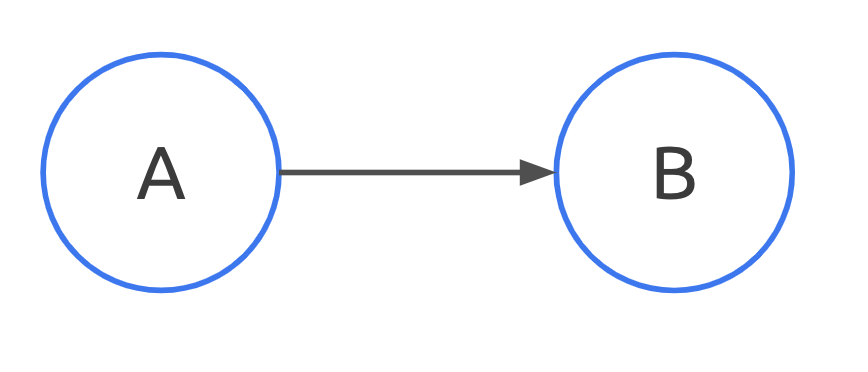

$A$ and $B$ are in two distinct groups, since there are only two nodes total and $A$ has an edge to $B$. This holds as you add additional nodes or create new graphs:

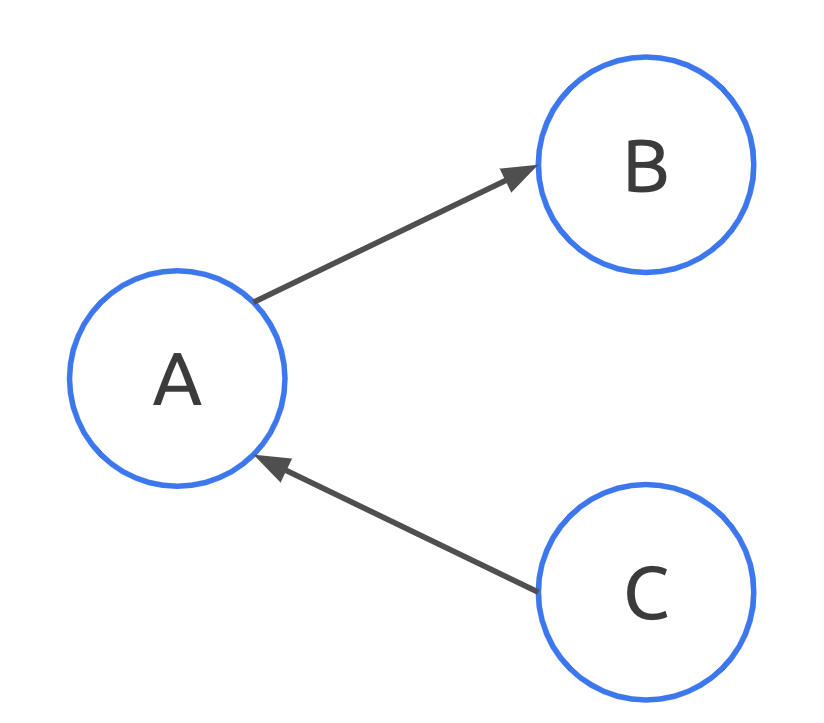


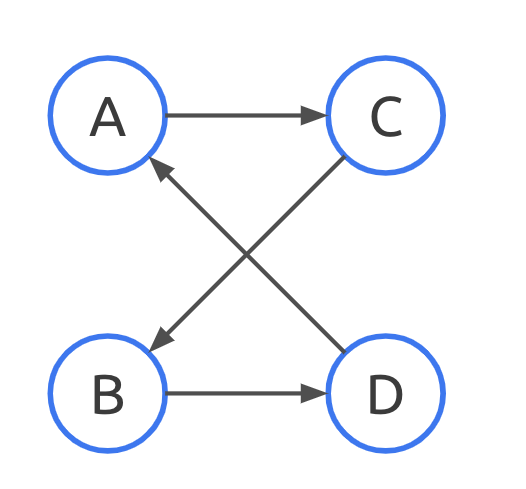

---

You could imagine a bipartite graph as having a line between the left and right sides of the graph and only having edges cross that line. That said, bipartite graphs can be tricky, as it can be more challenging to detect if a graph is bipartite by inspection, depending on the graph:

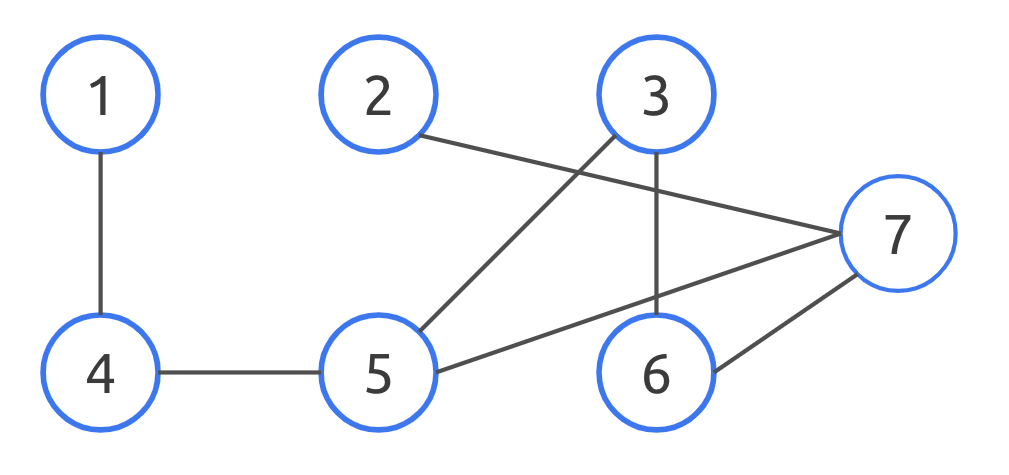

Does that graph look bipartite, for instance? Because it is!

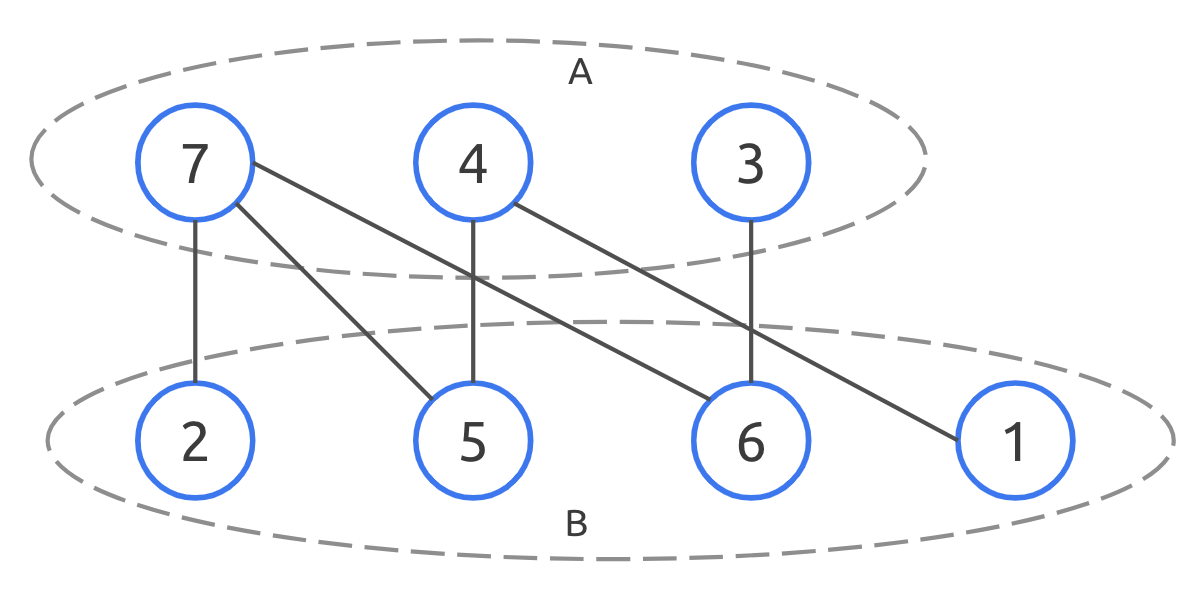

One way to determine if a graph is bipartite or not is to perform a task called **node coloring**. Essentially, imagine going through the graph and assigning each node a color, red, or blue. If you can go through the entire graph such that red nodes are only connected to blue nodes and vice-versa, then the graph is said to be 2-colorable and is therefore bipartite.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []
    self.color = ''

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s (%s): %s' % (
        self.name, self.color, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s (%s): %s' % (
        self.name, self.color, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def is_2_colorable(self):
    POSSIBLE_COLORS = ['red', 'blue']
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

There are a few things to keep in mind, for this one:

*   There's no guarantee that the graph is fully connected, so don't assume you can just start with one node. That said, since it's an undirected graph, if you have a node that isn't connected to the rest of the graph, it is its own component, so its color can be selected arbitrarily.
*   A graph cannot be 2-colored if any two nodes that are the same color are connected. This means that if you're moving from a node to its neighbors, its neighbors must always be a different color or you can return false.



### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4), Node(5), Node(6), 
             Node(7)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[3].add_connection(node_list[4])
node_list[4].add_connection(node_list[5])
node_list[5].add_connection(node_list[6])
node_list[6].add_connection(node_list[7])

print(graph.is_2_colorable())
# Should print: True

node_list = [Node(0), Node(1), Node(2), Node(3)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)


node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[2])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[2].add_connection(node_list[3])

print(graph.is_2_colorable())
# Should print: False

### Solution

The challenge here is figuring out how to keep your coloring consistent. For a given node, you can attempt to color its neighbors before storing them in the queue to simplify the code. This way, you don't need to keep track of what node you're coming from; each node preserves its color and you either stop when the entire graph is processed or when you hit a mismatch. This, in particular, is one reason breadth-first search is helpful, here; it makes it easy to process a node's neighbors instead of going deep down one track. You could do a similar implementation with depth-first search, but you would have to pass the next color recursively, instead.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []
    self.color = ''

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s (%s): %s' % (
        self.name, self.color, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s (%s): %s' % (
        self.name, self.color, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)


class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def is_2_colorable(self):
    POSSIBLE_COLORS = ['red', 'blue']
    node_queue = []
    if not self.node_list:
      return None
    visited_nodes = []
    for node in self.node_list:
      current_color = POSSIBLE_COLORS[0]
      if not node.color:
        # If we haven't seen a node before, we can make it red since this graph
        # is undirected. It means that, assuming our breadth-first search works
        # correctly, this component of the graph isn't connected to the 
        # component that we've already processed.
        node.color = current_color
        node_queue.append(node)
      while node_queue:
        node_to_check = node_queue.pop(0)
        current_color = node_to_check.color
        for next_node in node_to_check.connected_to:
          if next_node.color:
            if next_node.color == current_color:
              # If the next node is already the same color as our current node,
              # then the graph cannot be 2-colored and we should return False.
              return False
            else:
              # We've seen this node before, so no need add it to the queue
              # again.
              continue
          else:
            # The node has no color, so we should assign it one that doesn't
            # match the current node's color.
            if current_color == POSSIBLE_COLORS[0]:
              next_node.color = POSSIBLE_COLORS[1]
            else:
              next_node.color = POSSIBLE_COLORS[0]
            node_queue.append(next_node)
    return True

## Question 6

Your coworker has been developing a new algorithm for determining the shortest path between two nodes. To find the shortest path, they're using breadth-first search, but their function doesn't seem to be working as expected. Can you identify the issues and correct them?

This time, they're testing it out on unweighted graphs and looking for the shortest path by number of edges. A path from node $1$ to node $4$ given by $1 \rightarrow 2 \rightarrow 4$ path is shorter than $1 \rightarrow 2 \rightarrow 5 \rightarrow 4$.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
def shortest_path(start_node, destination_node):
  node_queue = []
  current_path = [start_node]
  node_queue.append((start_node, current_path))
  while node_queue:
    (node_to_check, path) = node_queue.pop(0)
    if node_to_check == destination_node:
      print('%d, %s' % (len(path), [n.name for n in path]))
      return
    else:
      for next_node in node_to_check.connected_to:
        path.append(next_node)
        node_queue.append((next_node, path))
  print('No path found.')

### Hint

It seems like `path` isn't correctly keeping track of the current path and is instead just adding a ton of nodes to it. So many nodes, in fact, that the endpoint isn't even the correct destination node! That said, it seems to be happening the same way every time the code is run, so it's not a race condition or anything.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[4])
node_list[1].add_connection(node_list[2])
node_list[2].add_connection(node_list[3])
node_list[2].add_connection(node_list[0])
node_list[4].add_connection(node_list[2])

shortest_path(node_list[0], node_list[3])
# Should print: (3, [0, 2, 3])

### Solution

The problem here is that your coworker isn't correctly keeping track of the `path` array. They're allowing the same array to be used everywhere in the function, which only works if a new copy of the array is stored every time. Adding a new copy of the array as `next_path` allows us to keep track of the new paths that are being generated by the breadth-first search algorithm and produces the correct result.

In [ ]:
def shortest_path(start_node, destination_node):
  node_queue = []
  current_path = [start_node]
  node_queue.append((start_node, current_path))
  while node_queue:
    (node_to_check, path) = node_queue.pop(0)
    if node_to_check == destination_node:
      print('%d, %s' % (len(path), [n.name for n in path]))
      return
    else:
      for next_node in node_to_check.connected_to:
        next_path = path[:]
        next_path.append(next_node)
        node_queue.append((next_node, next_path))
  print('No path found.')